In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snspan
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/thrymr/Downloads/comments_with_emotions.csv')
print(df)
df.info()

                                                comment  like_count  \
0     If this fight were real and not just an exhibi...           0   
1     Tyson will bust his hide. People forget with h...           0   
2        We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥           0   
3     Watching cm punk fight in the ufc is better th...           0   
4     Yall forget how much Ring IQ this guy has. AND...           0   
...                                                 ...         ...   
1151                                                WTF           0   
1152                            Is this real or a joke?          42   
1153                                               Bruh           0   
1154                                    First comment 😂           0   
1155  Maa kasam jisne like subscribe na kiya wo exam...           1   

              published_at                       author sentiment  \
0     2024-10-26T01:19:27Z               @thesecond4113  Positive   
1     202

In [3]:
df = df.drop_duplicates()

df = df.dropna()

df = df.drop(columns=['published_at', 'author'])

print(df)

                                                comment  like_count sentiment  \
0     If this fight were real and not just an exhibi...           0  Positive   
1     Tyson will bust his hide. People forget with h...           0   Neutral   
2        We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥           0   Neutral   
3     Watching cm punk fight in the ufc is better th...           0  Positive   
4     Yall forget how much Ring IQ this guy has. AND...           0  Positive   
...                                                 ...         ...       ...   
1151                                                WTF           0  Negative   
1152                            Is this real or a joke?          42  Positive   
1153                                               Bruh           0   Neutral   
1154                                    First comment 😂           0  Positive   
1155  Maa kasam jisne like subscribe na kiya wo exam...           1  Negative   

                           

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for 'comment' column
text = " ".join(comment for comment in df['comment'].astype(str))

/tmp/ipykernel_42077/2063061759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')


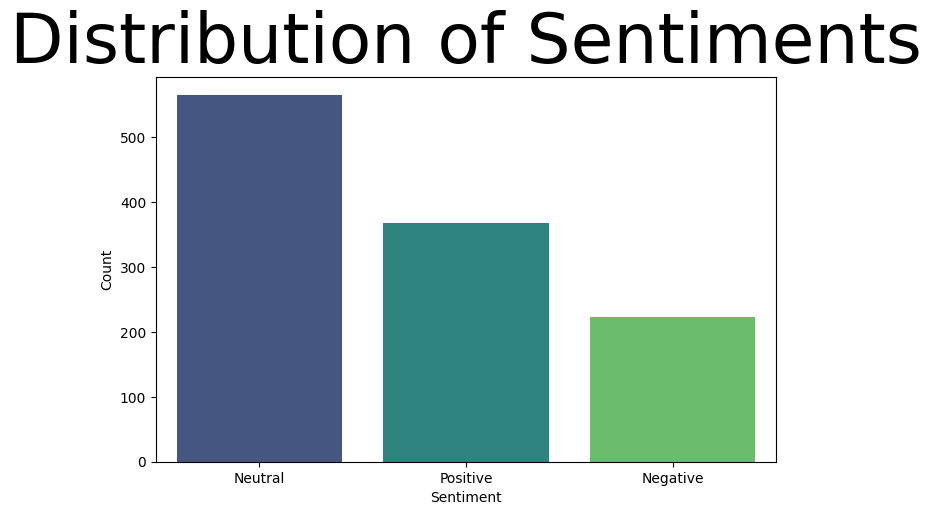

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')
plt.title("Distribution of Sentiments", fontsize=50)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

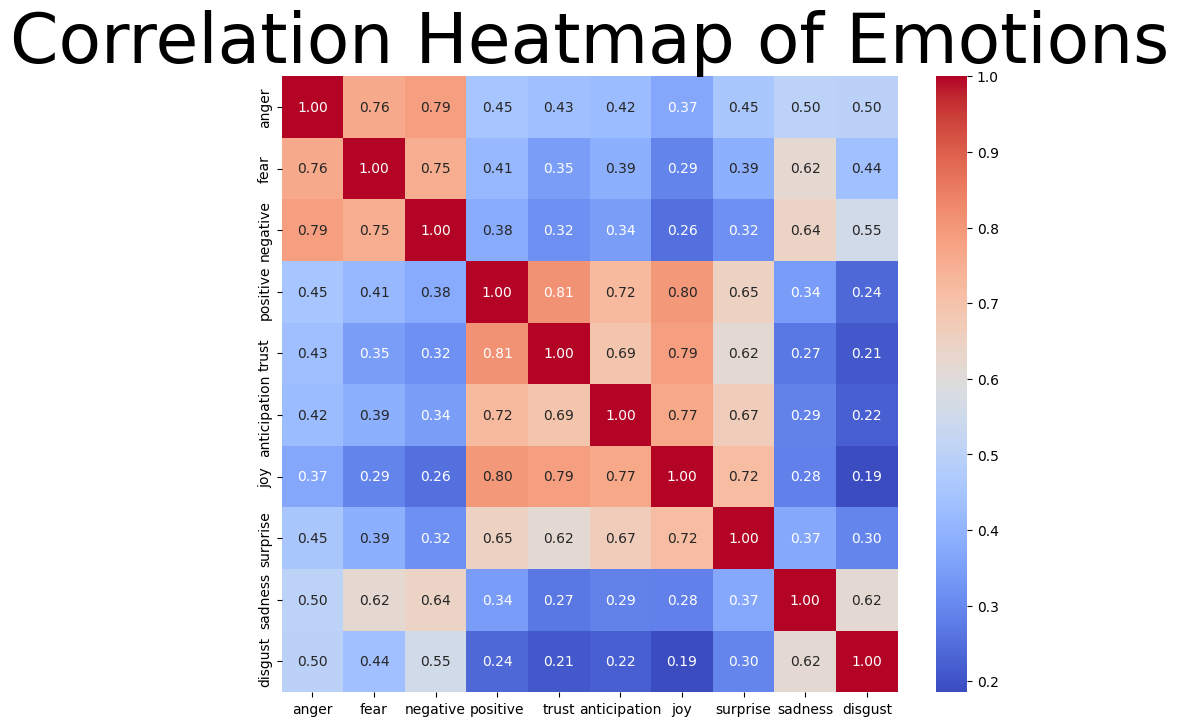

In [6]:
emotion_columns = ['anger', 'fear', 'negative', 'positive', 'trust',
                   'anticipation', 'joy', 'surprise', 'sadness', 'disgust']
correlation_matrix = df[emotion_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Emotions", fontsize=50)
plt.show()

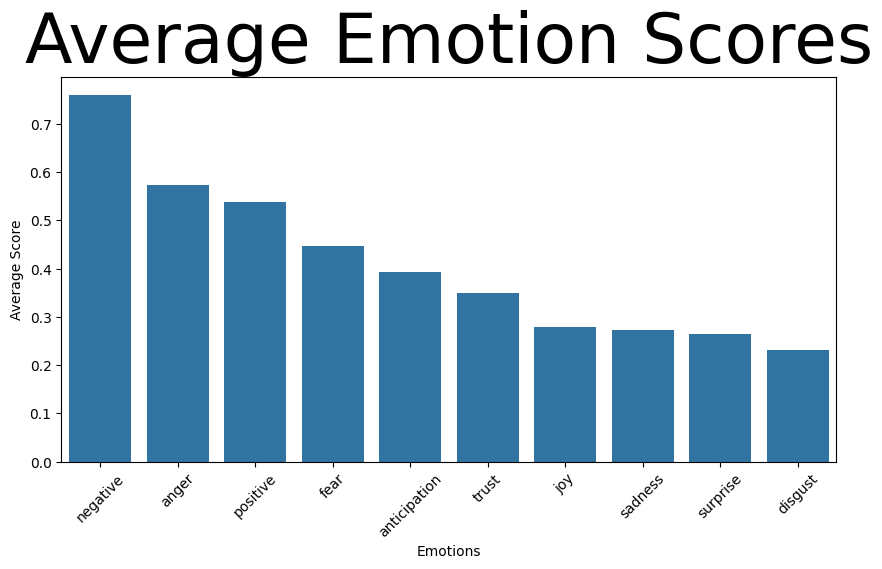

In [7]:
mean_emotions = df[emotion_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_emotions.index, y=mean_emotions.values)
plt.title("Average Emotion Scores", fontsize=50)
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to /home/thrymr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_42077/1303493321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


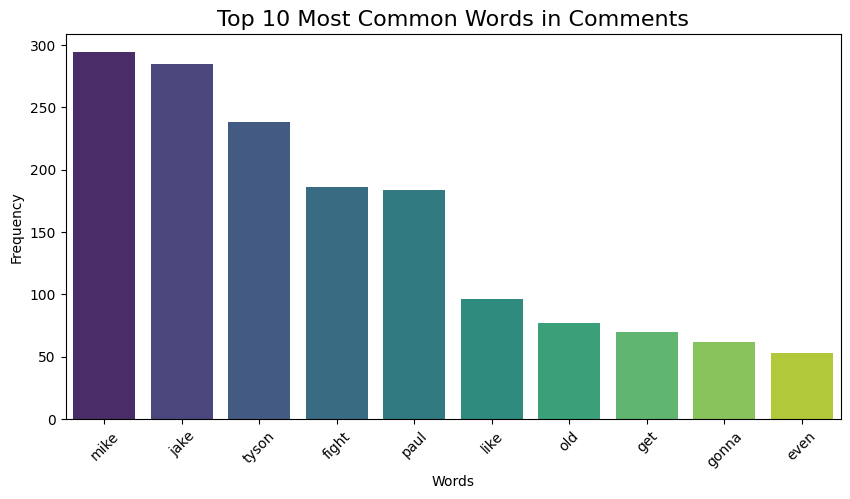

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = " ".join(df['comment'].astype(str)).split()
filtered_words = [word.lower() for word in all_words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Common Words in Comments", fontsize=16)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

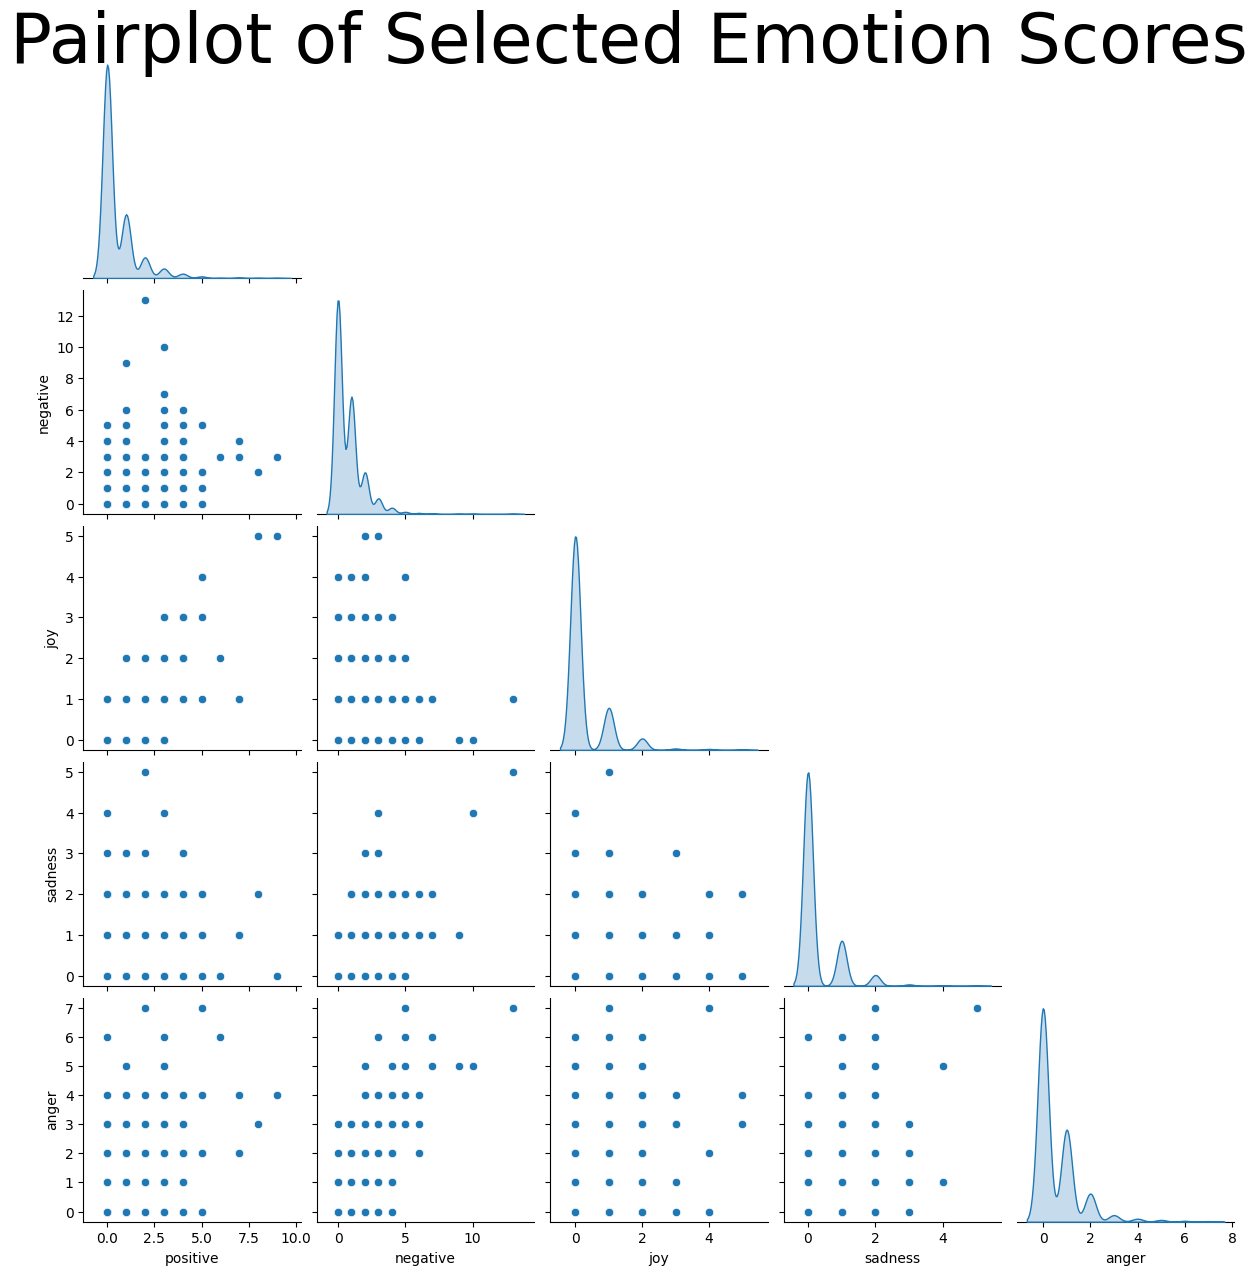

In [9]:
selected_emotions = ['positive', 'negative', 'joy', 'sadness', 'anger']
sns.pairplot(df[selected_emotions], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Emotion Scores", y=1.02, fontsize=50)
plt.show()

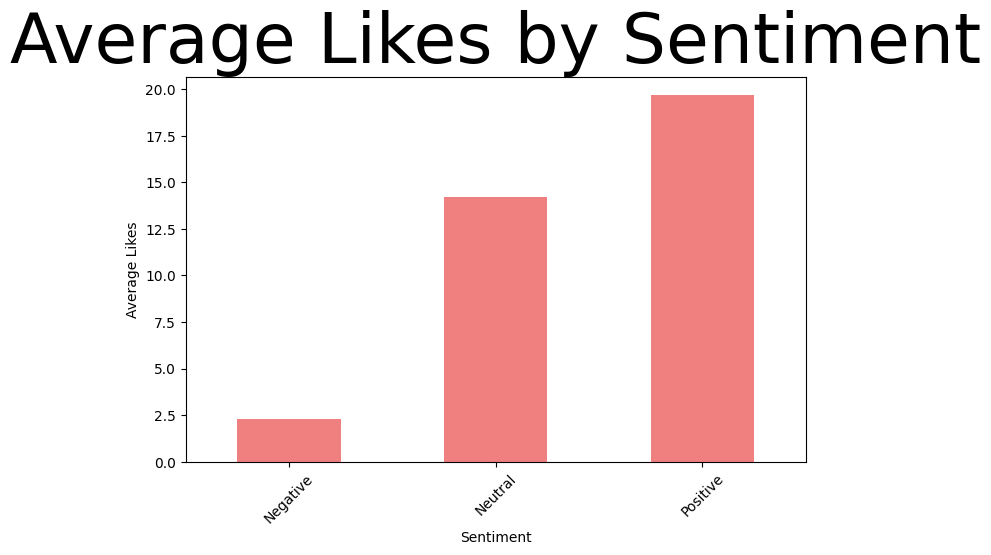

In [10]:
avg_likes = df.groupby('sentiment')['like_count'].mean()
plt.figure(figsize=(8, 5))
avg_likes.plot(kind='bar', color='lightcoral')
plt.title("Average Likes by Sentiment", fontsize=50)
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

In [11]:
pd.set_option('display.max_colwidth', None)

# Comments with highest positive emotion scores
top_positive_comments = df.sort_values(by='positive', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'positive']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        comment  \
57                                                        I think you past your prime and are foolish enough to think the internet cares about your extremist mindset on a boxing match forgetting that the entertainment world is all about entertainment and engagement. You do the engaging and we will watch it for the entertainment . Tysons a full grown man who makes his own

In [12]:
top_negative_comments = df.sort_values(by='negative', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_negative_comments[['comment', 'negative']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  comment  \
280  Mr Tyson  no disrespect bro , please , PLEASE withdraw from this fight with the young hungry heavyweight prospect & future Undisputed World Champion ,"The 1:24  Problem Child" Jake Paul (10-1- 0  7 KO) ,  1st dan black belt Uechi Ryu Karate Do  🥋🇯🇵  .\n\nOnce again Mr Tyson , please PLEASE withdraw from this dangerous fight as you will be hurt & we fear for your health & safety .\n\n\nFriend of Grandmaster Steven Segal Sensei : 11th dan black belt 🥋 